# Logistic regression

```{figure} ../../../images/ml-regression/logistic-linear.png
---
name: 'Logistic vs. linear regression infographic'
width: 100%
---
Logistic regression to predict categories. Infographic by [Dasani Madipalli](https://twitter.com/dasani_decoded)
```

## Introduction

In this final section on Regression, one of the basic _classic_ Machine Learning techniques, we will take a look at Logistic Regression. You would use this technique to discover patterns to predict binary categories. Is this candy chocolate or not? Is this disease contagious or not? Will this customer choose this product or not?

In this section, you will learn:

- A new library for data visualization
- Techniques for logistic regression

```{seealso}
Deepen your understanding of working with this type of regression in this [Learn module](https://docs.microsoft.com/learn/modules/train-evaluate-classification-models?WT.mc_id=academic-77952-leestott)
```

## Prerequisite

Having worked with the pumpkin data, we are now familiar enough with it to realize that there's one binary category that we can work with: `Color`.

Let's build a logistic regression model to predict that, given some variables, _what color a given pumpkin is likely to be_ (orange 🎃 or white 👻).

```{note}
Why are we talking about binary classification in a section grouping about regression? Only for linguistic convenience, as logistic regression is [really a classification method](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), albeit a linear-based one. Learn about other ways to classify data in the next lesson group.
```

## Define the question

For our purposes, we will express this as a binary: 'Orange' or 'Not Orange'. There is also a 'striped' category in our dataset but there are few instances of it, so we will not use it. It disappears once we remove null values from the dataset, anyway.

```{seealso}
Fun fact, we sometimes call white pumpkins 'ghost' pumpkins. They aren't very easy to carve, so they aren't as popular as the orange ones but they are cool looking!
```

## About logistic regression

Logistic regression differs from linear regression, which you learned about previously, in a few important ways.

### Binary classification

Logistic regression does not offer the same features as linear regression. The former offers a prediction about a binary category ("orange or not orange") whereas the latter is capable of predicting continual values, for example given the origin of a pumpkin and the time of harvest, _how much its price will rise_.

```{figure} ../../../images/ml-regression/pumpkin-classifier.png
---
name: 'Pumpkin classification Model'
width: 100%
---
Infographic by [Dasani Madipalli](https://twitter.com/dasani_decoded)
```

### Other classifications

There are other types of logistic regression, including multinomial and ordinal:

- **Multinomial**, which involves having more than one category - "Orange, White, and Striped".
- **Ordinal**, which involves ordered categories, useful if we wanted to order our outcomes logically, like our pumpkins that are ordered by a finite number of sizes (mini, sm, med, lg, xl, xxl).

```{figure} ../../../images/ml-regression/multinomial-ordinal.png
---
name: 'Multinomial vs ordinal regression'
width: 100%
---
Infographic by [Dasani Madipalli](https://twitter.com/dasani_decoded)
```

### It's still linear

Even though this type of Regression is all about 'category predictions', it still works best when there is a clear linear relationship between the dependent variable (color) and the other independent variables (the rest of the dataset, like city name and size). It's good to get an idea of whether there is any linearity dividing these variables or not.

### Variables DO NOT have to correlate

Remember how linear regression worked better with more correlated variables? Logistic regression is the opposite - the variables don't have to align. That works for this data which has somewhat weak correlations.

### You need a lot of clean data

Logistic regression will give more accurate results if you use more data; our small dataset is not optimal for this task, so keep that in mind.

```{note}
Think about the types of data that would lend themselves well to logistic regression.
```

## Exercise - tidy the data

First, clean the data a bit, dropping null values and selecting only some of the columns:

1. Add the following code:

In [1]:
import pandas as pd
import numpy as np

pumpkins = pd.read_csv('../../assets/data/us-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

You can always take a peek at your new dataframe:

In [3]:
new_pumpkins.info

<bound method DataFrame.info of       City Name  Package  Variety  Origin  Item Size  Color
2             1        3        4       3          3      0
3             1        3        4      17          3      0
4             1        3        4       5          2      0
5             1        3        4       5          2      0
6             1        4        4       5          3      0
...         ...      ...      ...     ...        ...    ...
1694         12        3        5       4          6      1
1695         12        3        5       4          6      1
1696         12        3        5       4          6      1
1697         12        3        5       4          6      1
1698         12        3        5       4          6      1

[991 rows x 6 columns]>

### Visualization - side-by-side grid

By now you have loaded up the [starter notebook](../../assignments/ml-fundamentals/pumpkin-varieties-and-color.ipynb) with pumpkin data once again and cleaned it so as to preserve a dataset containing a few variables, including `Color`. Let's visualize the dataframe in the notebook using a different library: [Seaborn](https://seaborn.pydata.org/index.html), which is built on Matplotlib which we used earlier.

Seaborn offers some neat ways to visualize your data. For example, you can compare distributions of the data for each point in a side-by-side grid.

1. Create such a grid by instantiating a `PairGrid`, using our pumpkin data `new_pumpkins`, followed by calling `map()`:

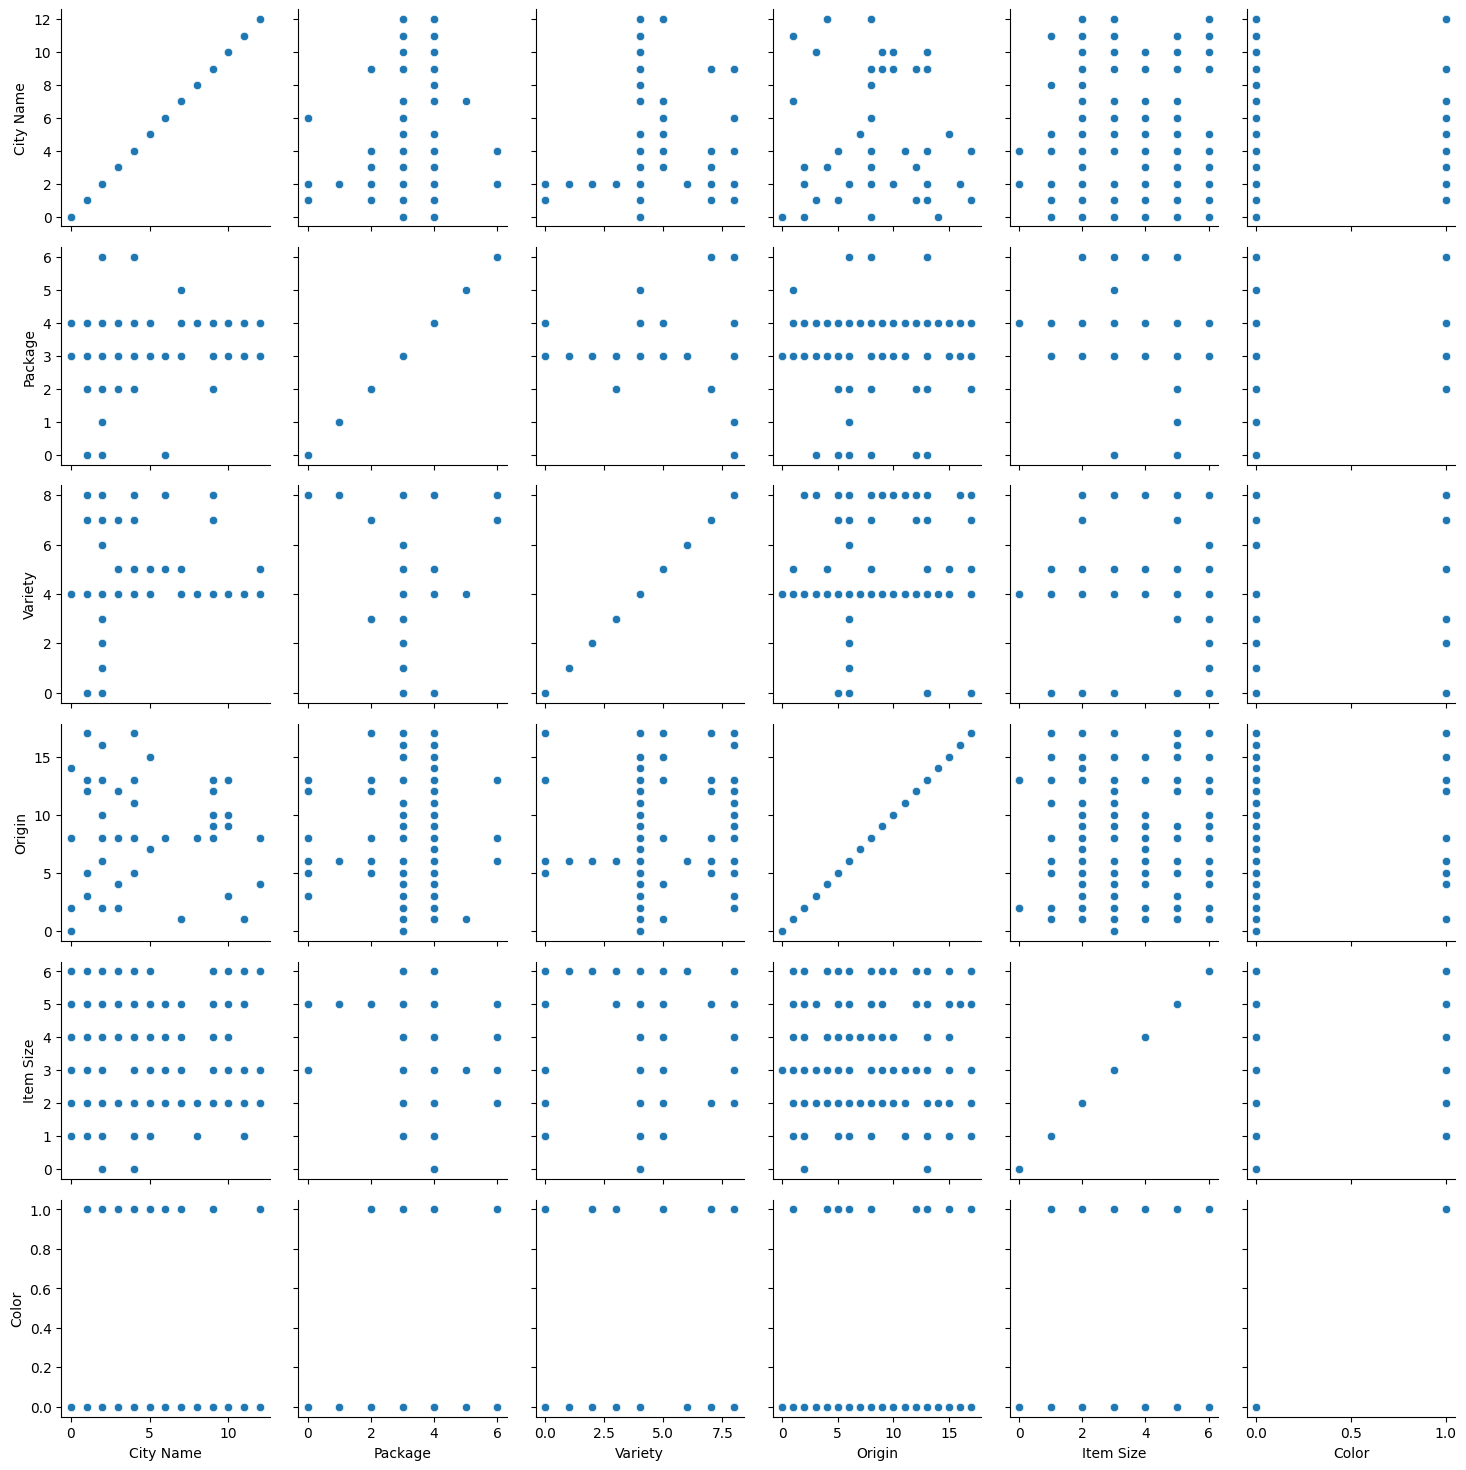

In [4]:
import seaborn as sns

g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)

By observing data side-by-side, you can see how the Color data relates to the other columns.

```{seealso}
Given this scatterplot grid, what are some interesting explorations you can envision?
```

### Use a swarm plot

Since Color is a binary category (Orange or Not), it's called 'categorical data' and needs 'a more [specialized approach](https://seaborn.pydata.org/tutorial/categorical.html?highlight=bar) to visualization'. There are other ways to visualize the relationship of this category with other variables. 

You can visualize variables side-by-side with Seaborn plots.

1. Try a 'swarm' plot to show the distribution of values:

/usr/share/miniconda/envs/open-machine-learning-jupyter-book/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/share/miniconda/envs/open-machine-learning-jupyter-book/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='Color', ylabel='Item Size'>

/usr/share/miniconda/envs/open-machine-learning-jupyter-book/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/share/miniconda/envs/open-machine-learning-jupyter-book/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


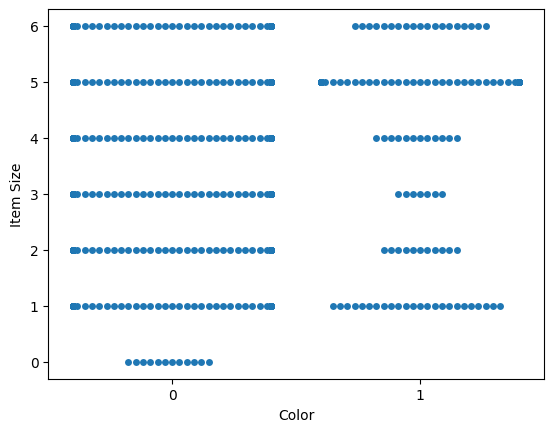

In [5]:
sns.swarmplot(x="Color", y="Item Size", data=new_pumpkins)

### Violin plot

A 'violin' type plot is useful as you can easily visualize the way that data in the two categories is distributed. Violin plots don't work so well with smaller datasets as the distribution is displayed more 'smoothly'.

1. As parameters `x=Color`, `kind="violin"` and call `catplot()`:

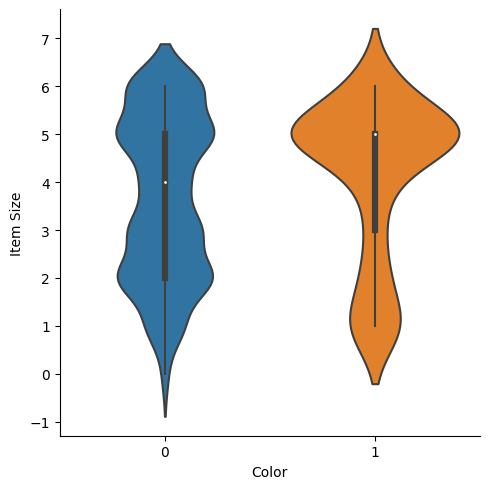

In [6]:
sns.catplot(x="Color", y="Item Size",
            kind="violin", data=new_pumpkins)

```{seealso}
Try creating this plot, and other Seaborn plots, using other variables.
```

Now that we have an idea of the relationship between the binary categories of color and the larger group of sizes, let's explore logistic regression to determine a given pumpkin's likely color.

```{seealso}

**Show Me The Math**

Remember how linear regression often used ordinary least squares to arrive at a value? Logistic regression relies on the concept of 'maximum likelihood' using [sigmoid functions](https://wikipedia.org/wiki/Sigmoid_function). A 'Sigmoid Function' on a plot looks like an 'S' shape. It takes a value and maps it to somewhere between 0 and 1. Its curve is also called a 'logistic curve'. Its formula looks like this:

:::{figure-md} Logistic function
<img src="../../../images/ml-regression/sigmoid.png" width="90%" class="bg-white mb-1">

Logistic function{cite}`logistic_function`
:::

Where the sigmoid's midpoint finds itself at x's $0$ point, L is the curve's maximum value, and $k$ is the curve's steepness. If the outcome of the function is more than 0.5, the label in question will be given the class '1' of the binary choice. If not, it will be classified as '0'.

```

## Build your model

Building a model to find these binary classification is surprisingly straightforward in Scikit-learn.

1 . Select the variables you want to use in your classification model and split the training and test sets calling `train_test_split()`:

In [7]:
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','City Name','Package']

X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


2 . Now you can train your model, by calling `fit()` with your training data, and print out its result:

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy:  0.8140703517587939


```{note}
Take a look at your model's scoreboard. It's not too bad, considering you have only about 1000 rows of data.
```

## Better comprehension via a confusion matrix

While you can get a scoreboard report [terms](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report#sklearn.metrics.classification_report) by printing out the items above, you might be able to understand your model more easily by using a [confusion matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) to help us understand how the model is performing.

```{note}
🎓 A '[confusion matrix](https://wikipedia.org/wiki/Confusion_matrix)' (or 'error matrix') is a table that expresses your model's true vs. false positives and negatives, thus gauging the accuracy of predictions.
```

1. To use a confusion metrics, call `confusion_matrix()`:

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 33,   0]])

Take a look at your model's confusion matrix:

```output
array([[162,   4],
        [ 33,   0]])
```

In Scikit-learn, confusion matrices Rows (axis 0) are actual labels and columns (axis 1) are predicted labels.

What's going on here? Let's say our model is asked to classify pumpkins between two binary categories, category 'orange' and category 'not-orange'.

- If your model predicts a pumpkin as not orange and it belongs to category 'not-orange' in reality we call it a true negative, shown by the top left number.
- If your model predicts a pumpkin as orange and it belongs to category 'not-orange' in reality we call it a false negative, shown by the bottom left number.
- If your model predicts a pumpkin as not orange and it belongs to category 'orange' in reality we call it a false positive, shown by the top right number.
- If your model predicts a pumpkin as orange and it belongs to category 'orange' in reality we call it a true positive, shown by the bottom right number.

As you might have guessed it's preferable to have a larger number of true positives and true negatives and a lower number of false positives and false negatives, which implies that the model performs better.

How does the confusion matrix relate to precision and recall? Remember, the classification report printed above showed precision (0.83) and recall (0.98).

$$
Precision = \frac{tp}{tp + fp} = \frac{162}{162 + 33} = 0.8307692307692308

Recall = \frac{tp}{tp + fn} = \frac{162}{162 + 4} = 0.9759036144578314
$$

```{note}
Q: According to the confusion matrix, how did the model do? A: Not too bad; there are a good number of true negatives but also several false negatives. 
```

Let's revisit the terms we saw earlier with the help of the confusion matrix's mapping of $\frac{TP}{TN}$ and $\frac{FP}{FN}$ :

🎓 Precision: $\frac{TP}{TP + FP}$ The fraction of relevant instances among the retrieved instances (e.g. which labels were well-labeled)

🎓 Recall: $\frac{TP}{TP + FN}$ The fraction of relevant instances that were retrieved, whether well-labeled or not

🎓 f1-score: $\frac{2 * precision * recall}{precision + recall}$ A weighted average of the precision and recall, with best being 1 and worst being 0

🎓 Support: The number of occurrences of each label retrieved

🎓 Accuracy: $\frac{TP + TN}{TP + TN + FP + FN}$ The percentage of labels predicted accurately for a sample.

🎓 Macro Avg: The calculation of the unweighted mean metrics for each label, not taking label imbalance into account.

🎓 Weighted Avg: The calculation of the mean metrics for each label, taking label imbalance into account by weighting them by their support (the number of true instances for each label).

```{seealso}
Can you think which metric you should watch if you want your model to reduce the number of false negatives?
```

## Visualize the ROC curve of this model

This is not a bad model; its accuracy is in the 80% range so ideally you could use it to predict the color of a pumpkin given a set of variables.

Let's do one more visualization to see the so-called 'ROC' score:

<AxesSubplot: >

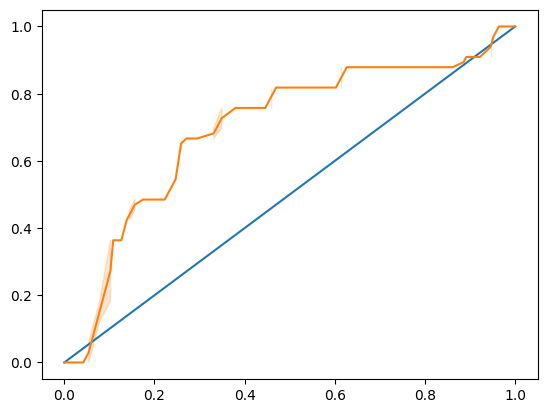

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
sns.lineplot(x=[0, 1], y=[0, 1])
sns.lineplot(x=fpr, y=tpr)

Using Seaborn again, plot the model's [Receiving Operating Characteristic](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html?highlight=roc) or ROC. ROC curves are often used to get a view of the output of a classifier in terms of its true vs. false positives. "ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis." Thus, the steepness of the curve and the space between the midpoint line and the curve matter: you want a curve that quickly heads up and over the line. In our case, there are false positives to start with, and then the line heads up and over properly:

Finally, use Scikit-learn's [`roc_auc_score` API](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html?highlight=roc_auc#sklearn.metrics.roc_auc_score) to compute the actual 'Area Under the Curve' (AUC):

In [11]:
auc = roc_auc_score(y_test,y_scores[:, 1])
print(auc)

0.6976998904709748


The result is `0.6976998904709748`. Given that the AUC ranges from 0 to 1, you want a big score, since a model that is 100% correct in its predictions will have an AUC of 1; in this case, the model is _pretty good_.

In future lessons on classifications, you will learn how to iterate to improve your model's scores. But for now, congratulations! You've completed these regression sections!

## Your turn! 🚀

There's a lot more to unpack regarding logistic regression! But the best way to learn is to experiment. Find a dataset that lends itself to this type of analysis and build a model with it. What do you learn? tip: try [Kaggle](https://www.kaggle.com/search?q=logistic+regression+datasets) for interesting datasets.

Assignment - [Retrying some regression](../../assignments/ml-fundamentals/retrying-some-regression.md)

## Self study

Read the first few pages of [this paper from Stanford](https://web.stanford.edu/~jurafsky/slp3/5.pdf) on some practical uses for logistic regression. Think about tasks that are better suited for one or the other type of regression tasks that we have studied up to this point. What would work best?

## Acknowledgments

Thanks to Microsoft for creating the open-source course [ML-For-Beginners](https://github.com/microsoft/ML-For-Beginners). It inspires the majority of the content in this chapter.

---

```{bibliography}
:filter: docname in docnames
```